In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [17]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
    ])

transform = transforms.ToTensor()

mnist_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=1000,
                                          shuffle=True)

In [19]:
dataiter = iter(data_loader)
images, labels = next(dataiter)  # Use next() directly
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [29]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [30]:
model = AutoEncoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-2, 
                             weight_decay=1e-5)

In [ ]:
# Point to training loop video
num_epochs = 100
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0882
Epoch:2, Loss:0.0875
Epoch:3, Loss:0.0863
Epoch:4, Loss:0.0869
Epoch:5, Loss:0.0869
Epoch:6, Loss:0.0856
Epoch:7, Loss:0.0886
Epoch:8, Loss:0.0876
Epoch:9, Loss:0.0869
Epoch:10, Loss:0.0870
Epoch:11, Loss:0.0861
Epoch:12, Loss:0.0890
Epoch:13, Loss:0.0883


Length of outputs: 70


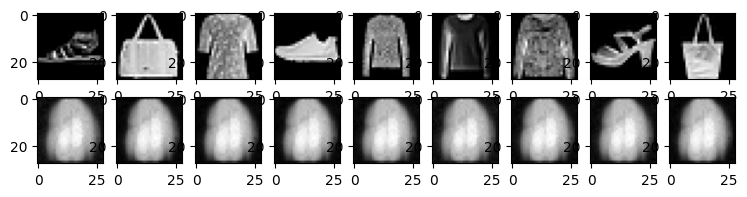

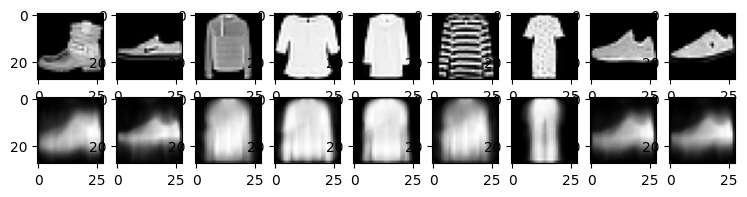

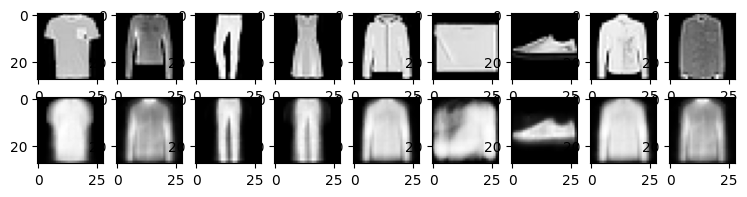

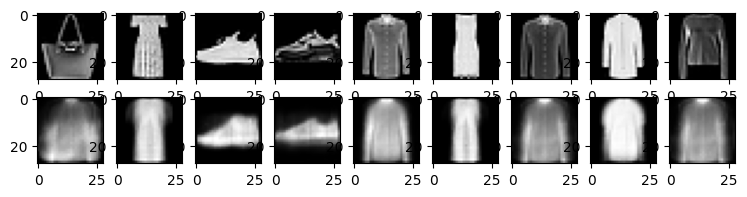

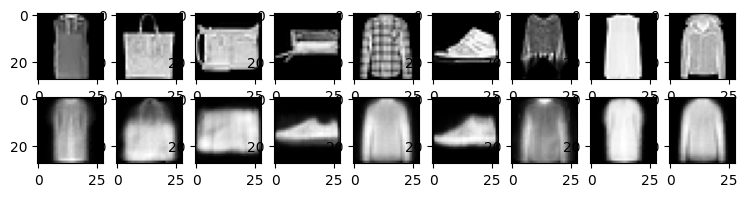

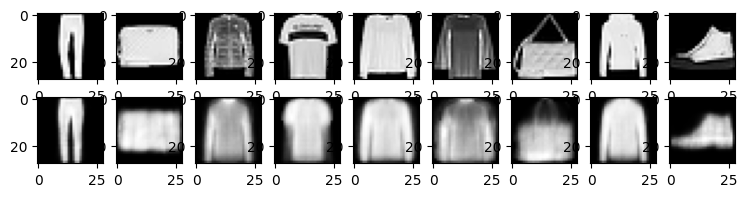

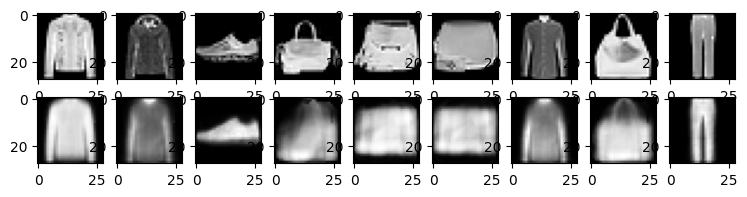

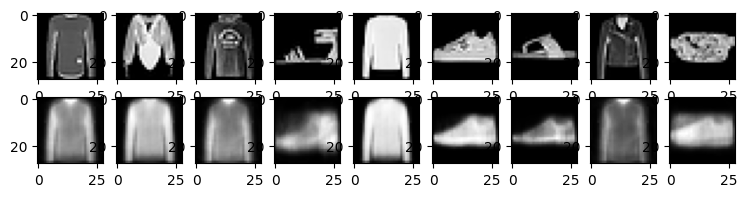

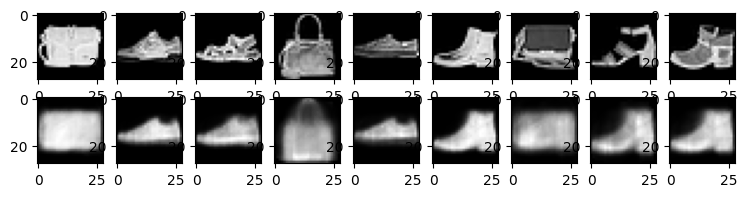

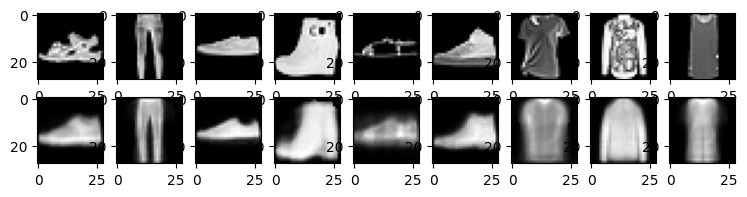

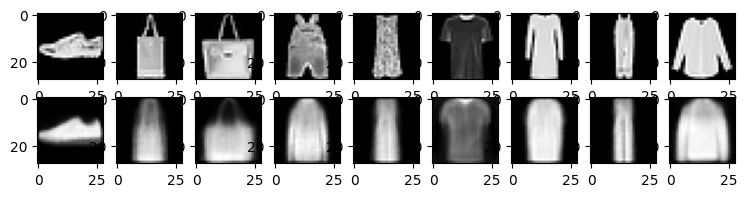

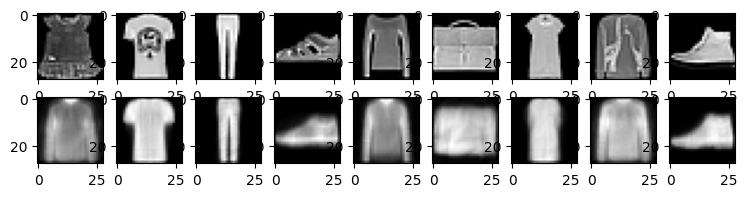

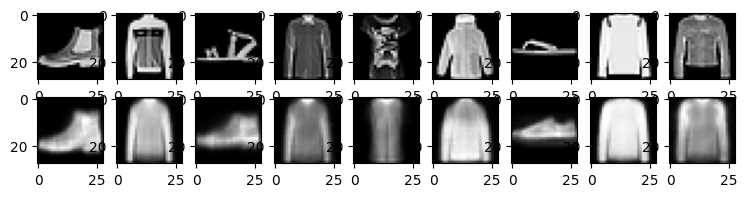

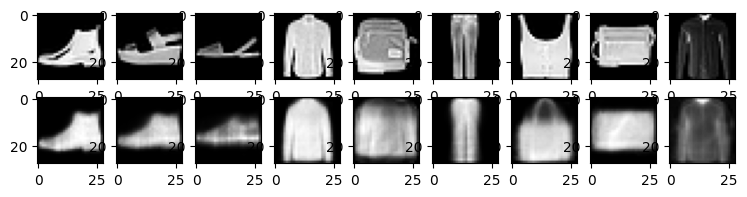

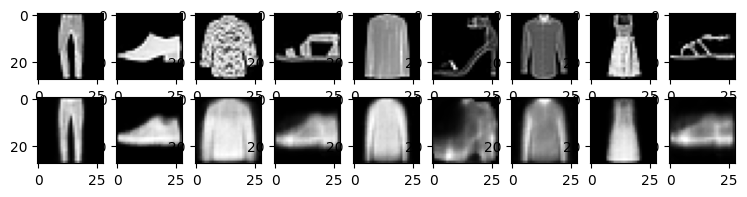

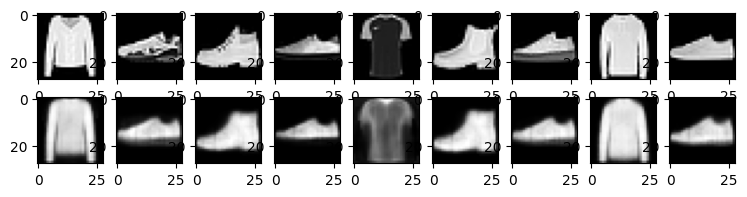

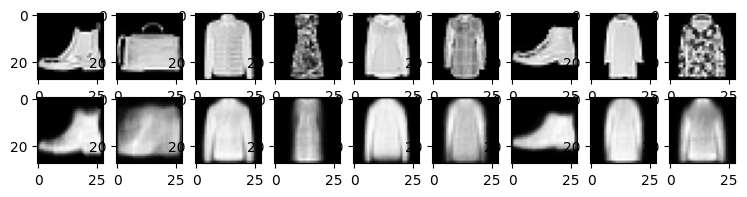

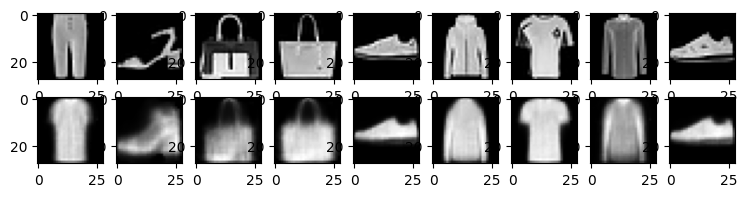

IndexError: list index out of range

<Figure size 900x200 with 0 Axes>

In [23]:
# Check the length of outputs to ensure it matches num_epochs
print("Length of outputs:", len(outputs))

# # Optionally print the structure of outputs[k] to ensure it has the expected elements
# for k in range(num_epochs):
#     print(f"outputs[{k}]:", outputs[k])

# Ensure that outputs[k] has the expected format
# If everything is correct, you can proceed with the original code
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()  # Adjust here if structure is different
    recon = outputs[k][2].detach().numpy()  # Adjust here if structure is different
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)  # -> use for Autoencoder_Linear
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)  # -> use for Autoencoder_Linear
        plt.imshow(item[0])

    plt.show()
    plt.close()
